In [5]:
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 20.7 MB/s eta 0:00:00


In [6]:
from neuralprophet import NeuralProphet

ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.
ERROR:NP.plotly:Importing plotly failed. Interactive plots will not work.


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

In [8]:
# Mount Google Drive
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_08_26_2/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

Mounted at /content/drive


In [9]:
data_selected = data[['Alarm Name', 'Alarm Location Info', 'First Occurred On', 'Site ID', 'Vendor', 'Domain', 'Device Type']]
data_selected.head(10)

,Alarm Name,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type
0,Mains Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-22 11:45:53,AM0212,HUAWEI,Power,GBTS
1,Battery Deep Discharge Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN
2,Rectifier Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN
3,Theft Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:14:26,AM0212,HUAWEI,Power,GBTS
4,Cell Out of Service,"Site Index=28, Cell Index=143, Alarm Cause=Oth...",2024-08-21 16:12:09,AM0212,HUAWEI,Access,eGBTS
5,GSM Local Cell Unusable,GBTS Function Name=Kalmunai_Madavan_Rd-AM0212-...,2024-08-21 16:10:39,AM0212,HUAWEI,Access,eGBTS
6,Theft Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:09:26,AM0212,HUAWEI,Power,GBTS
7,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=62, Slot No.=0, TX ...",2024-08-21 11:12:49,AM0212,HUAWEI,Access,GBTS
8,Rectifier Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN
9,Battery Deep Discharge Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN


In [10]:
# prompt: get only alarms for site id PU0146

PU0146_alarms = data_selected[data_selected['Site ID'] == 'AM0212']
PU0146_alarms.head(10)



,Alarm Name,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type
0,Mains Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-22 11:45:53,AM0212,HUAWEI,Power,GBTS
1,Battery Deep Discharge Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN
2,Rectifier Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN
3,Theft Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:14:26,AM0212,HUAWEI,Power,GBTS
4,Cell Out of Service,"Site Index=28, Cell Index=143, Alarm Cause=Oth...",2024-08-21 16:12:09,AM0212,HUAWEI,Access,eGBTS
5,GSM Local Cell Unusable,GBTS Function Name=Kalmunai_Madavan_Rd-AM0212-...,2024-08-21 16:10:39,AM0212,HUAWEI,Access,eGBTS
6,Theft Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:09:26,AM0212,HUAWEI,Power,GBTS
7,RF Unit TX Channel Gain Out of Range,"Cabinet No.=0, Subrack No.=62, Slot No.=0, TX ...",2024-08-21 11:12:49,AM0212,HUAWEI,Access,GBTS
8,Rectifier Failure Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN
9,Battery Deep Discharge Alarm,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN


In [11]:
# prompt: encode the Alarm name column  and rename that column as y

le = LabelEncoder()
PU0146_alarms['y'] = le.fit_transform(PU0146_alarms['Alarm Name'])
PU0146_alarms = PU0146_alarms.drop('Alarm Name', axis=1)
PU0146_alarms.head(10)

,Alarm Location Info,First Occurred On,Site ID,Vendor,Domain,Device Type,y
0,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-22 11:45:53,AM0212,HUAWEI,Power,GBTS,16
1,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN,1
2,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN,23
3,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:14:26,AM0212,HUAWEI,Power,GBTS,25
4,"Site Index=28, Cell Index=143, Alarm Cause=Oth...",2024-08-21 16:12:09,AM0212,HUAWEI,Access,eGBTS,6
5,GBTS Function Name=Kalmunai_Madavan_Rd-AM0212-...,2024-08-21 16:10:39,AM0212,HUAWEI,Access,eGBTS,13
6,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:09:26,AM0212,HUAWEI,Power,GBTS,25
7,"Cabinet No.=0, Subrack No.=62, Slot No.=0, TX ...",2024-08-21 11:12:49,AM0212,HUAWEI,Access,GBTS,21
8,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN,23
9,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN,1


from matplotlib import pyplot as plt
_df_0['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Alarm Location Info').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('First Occurred On').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Domain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Device Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['First Occurred On'].value_counts()
    for x_label, grp in _df_6.groupby('Alarm Location Info')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Alarm Location Info')
_ = plt.ylabel('First Occurred On')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Domain'].value_counts()
    for x_label, grp in _df_7.groupby('First Occurred On')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('First Occurred On')
_ = plt.ylabel('Domain')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Device Type'].value_counts()
    for x_label, grp in _df_8.groupby('Domain')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Domain')
_ = plt.ylabel('Device Type')

WARNING - (py.warnings._showwarnmsg) - <string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.






Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.





from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Alarm Location Info'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='y', y='Alarm Location Info', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

WARNING - (py.warnings._showwarnmsg) - <string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.






Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.





from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['First Occurred On'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='y', y='First Occurred On', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

WARNING - (py.warnings._showwarnmsg) - <string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.






Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.





from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Domain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='y', y='Domain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

WARNING - (py.warnings._showwarnmsg) - <string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.






Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.





from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Device Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='y', y='Device Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
# prompt: give mapping of encoded value to alarm name  print line by line

for i, alarm_name in enumerate(le.classes_):
  print(f'{i}: {alarm_name}')

0: BBU CPRI Interface Error
1: Battery Deep Discharge Alarm
2: Board Software Auto-Supply Failure
3: CSL Fault
4: Carrier Configuration Error
5: Cell Blocked
6: Cell Out of Service
7: Cell Unavailable
8: Configured Capacity Limit Exceeding Licensed Limit
9: Data Configuration Exceeding Licensed Limit
10: Extend Alarm
11: Fuse Failure Alarm
12: GSM Local Cell Capability Decline
13: GSM Local Cell Unusable
14: Licensed Feature Unusable
15: Logical Object Binding Error
16: Mains Failure Alarm
17: NE Is Disconnected
18: RF Unit ALD Current Out of Range
19: RF Unit DC Input Power Failure
20: RF Unit Maintenance Link Failure
21: RF Unit TX Channel Gain Out of Range
22: RF Unit VSWR Threshold Crossed
23: Rectifier Failure Alarm
24: SCTP Link Congestion
25: Theft Alarm


In [13]:
# prompt: rename first occured column as ds

PU0146_alarms = PU0146_alarms.rename(columns={'First Occurred On': 'ds'})
PU0146_alarms.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
0,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-22 11:45:53,AM0212,HUAWEI,Power,GBTS,16
1,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN,1
2,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN,23
3,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:14:26,AM0212,HUAWEI,Power,GBTS,25
4,"Site Index=28, Cell Index=143, Alarm Cause=Oth...",2024-08-21 16:12:09,AM0212,HUAWEI,Access,eGBTS,6
5,GBTS Function Name=Kalmunai_Madavan_Rd-AM0212-...,2024-08-21 16:10:39,AM0212,HUAWEI,Access,eGBTS,13
6,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:09:26,AM0212,HUAWEI,Power,GBTS,25
7,"Cabinet No.=0, Subrack No.=62, Slot No.=0, TX ...",2024-08-21 11:12:49,AM0212,HUAWEI,Access,GBTS,21
8,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN,23
9,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN,1


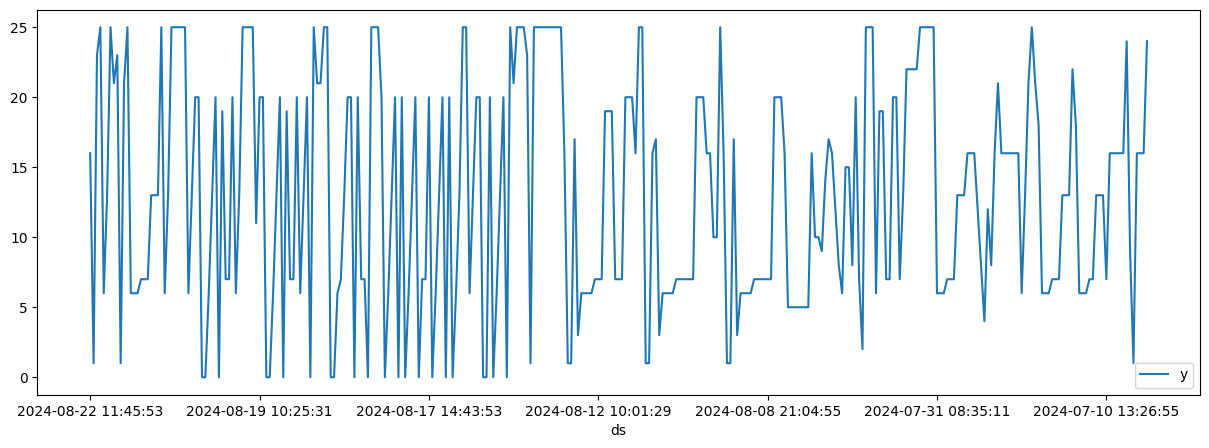

In [14]:
import pandas as pd

# Load the dataset from the CSV file using pandas
# df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
# Plot the dataset, showing price (y column) over time (ds column)
plt = PU0146_alarms.plot(x="ds", y="y", figsize=(15, 5))

In [15]:
# prompt: sort accoding to ds column latest alarms

PU0146_alarms['ds'] = pd.to_datetime(PU0146_alarms['ds'])
PU0146_alarms = PU0146_alarms.sort_values(by='ds', ascending=False)
PU0146_alarms.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
0,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-22 11:45:53,AM0212,HUAWEI,Power,GBTS,16
2,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN,23
1,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN,1
3,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:14:26,AM0212,HUAWEI,Power,GBTS,25
4,"Site Index=28, Cell Index=143, Alarm Cause=Oth...",2024-08-21 16:12:09,AM0212,HUAWEI,Access,eGBTS,6
5,GBTS Function Name=Kalmunai_Madavan_Rd-AM0212-...,2024-08-21 16:10:39,AM0212,HUAWEI,Access,eGBTS,13
6,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:09:26,AM0212,HUAWEI,Power,GBTS,25
7,"Cabinet No.=0, Subrack No.=62, Slot No.=0, TX ...",2024-08-21 11:12:49,AM0212,HUAWEI,Access,GBTS,21
8,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN,23
9,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN,1


In [16]:
# prompt: drop rows with y is unknown

PU0146_alarms = PU0146_alarms[PU0146_alarms['y'] != 'Unknown']

In [17]:
# prompt: remove duplicates in ds

PU0146_alarms = PU0146_alarms.drop_duplicates(subset=['ds'])
PU0146_alarms.head(10)


,Alarm Location Info,ds,Site ID,Vendor,Domain,Device Type,y
0,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-22 11:45:53,AM0212,HUAWEI,Power,GBTS,16
2,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-22 11:45:47,AM0212,HUAWEI,Power,NaN,23
3,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:14:26,AM0212,HUAWEI,Power,GBTS,25
4,"Site Index=28, Cell Index=143, Alarm Cause=Oth...",2024-08-21 16:12:09,AM0212,HUAWEI,Access,eGBTS,6
5,GBTS Function Name=Kalmunai_Madavan_Rd-AM0212-...,2024-08-21 16:10:39,AM0212,HUAWEI,Access,eGBTS,13
6,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-21 16:09:26,AM0212,HUAWEI,Power,GBTS,25
7,"Cabinet No.=0, Subrack No.=62, Slot No.=0, TX ...",2024-08-21 11:12:49,AM0212,HUAWEI,Access,GBTS,21
8,"Cabinet No.=0, Subrack No.=0, Slot No.=18, Por...",2024-08-20 09:35:03,AM0212,HUAWEI,Power,NaN,23
10,"Cabinet No.=0, Subrack No.=62, Slot No.=0, TX ...",2024-08-19 20:27:09,AM0212,HUAWEI,Access,GBTS,21
11,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2024-08-19 18:36:39,AM0212,HUAWEI,Power,GBTS,25


In [18]:
# prompt: keep only ds and y columns

PU0146_alarms = PU0146_alarms[['ds', 'y']]
PU0146_alarms.head(10)


,ds,y
0,2024-08-22 11:45:53,16
2,2024-08-22 11:45:47,23
3,2024-08-21 16:14:26,25
4,2024-08-21 16:12:09,6
5,2024-08-21 16:10:39,13
6,2024-08-21 16:09:26,25
7,2024-08-21 11:12:49,21
8,2024-08-20 09:35:03,23
10,2024-08-19 20:27:09,21
11,2024-08-19 18:36:39,25


In [19]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

PU0146_alarms['ds'] = pd.to_datetime(PU0146_alarms['ds'])  # Ensure 'ds' is datetime
PU0146_alarms = PU0146_alarms.set_index('ds').resample('H').mean().reset_index()

# Create a NeuralProphet model with default parameters
# Set the learning rate and define other hyperparameters directly
m = NeuralProphet(
    learning_rate=0.01,          # Set the learning rate to 0.005
    batch_size=32,
    seasonality_mode='additive',  # Seasonality mode (choose between 'additive' or 'multiplicative')
)

# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(PU0146_alarms)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-19-2a82e5fe8452>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PU0146_alarms['ds'] = pd.to_datetime(PU0146_alarms['ds'])  # Ensure 'ds' is datetime

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PU0146_alarms['ds'] = pd.to_datetime(PU0146_alarms['ds'])  # Ensure 'ds' is datetime



Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 22. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, future_df])

  df = pd.concat([df, future_df])



Predicting: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()

  ds = fcst["ds"].dt.to_pydatetime()



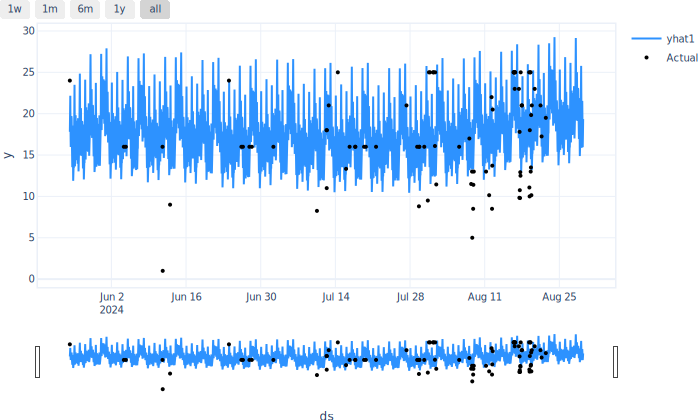

In [20]:
# Create a new dataframe reaching 24*7 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(PU0146_alarms, n_historic_predictions=True, periods=24*7)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.




Predicting: |          | 0/? [00:00<?, ?it/s]

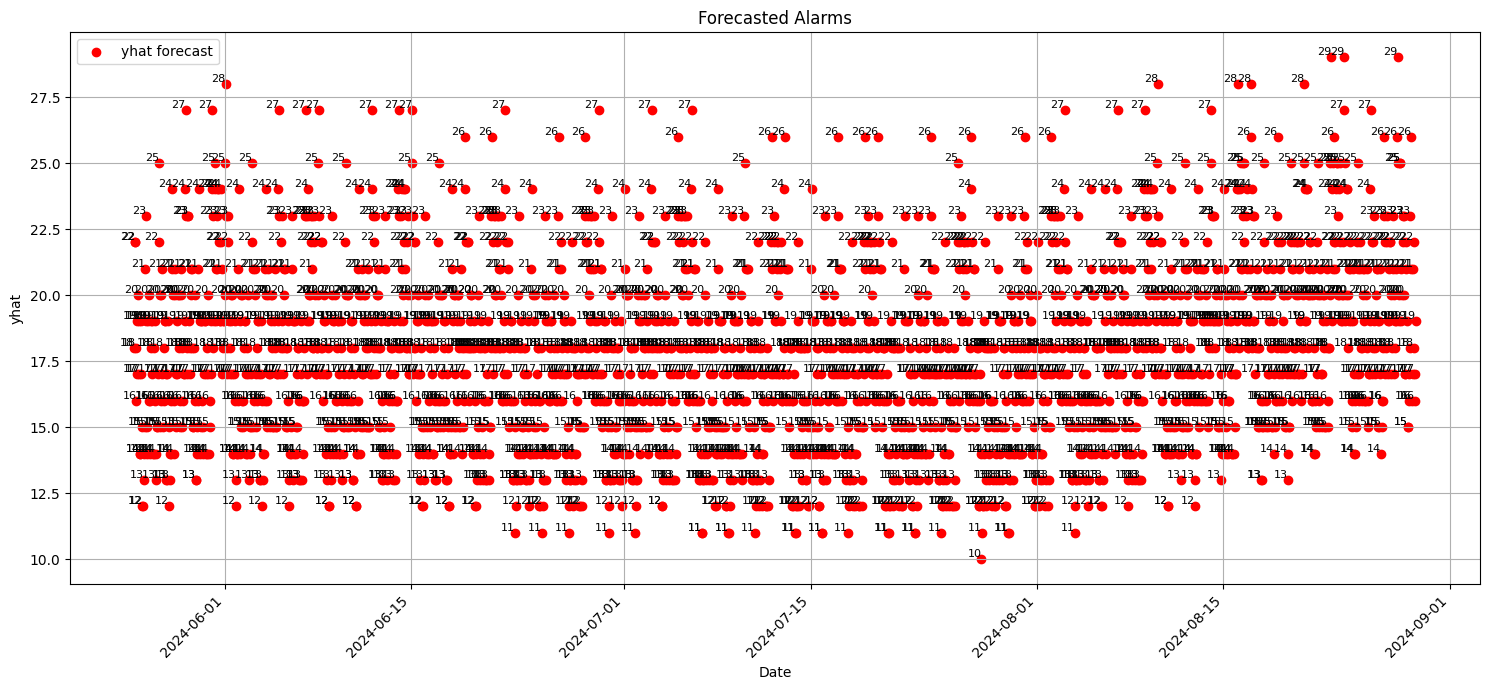

In [21]:
# Create a new dataframe reaching 7 days into the future for our forecast
df_future = m.make_future_dataframe(PU0146_alarms, n_historic_predictions=True, periods=24*7)

# Predict the future
forecast = m.predict(df_future)

import matplotlib.pyplot as plt

# Round predictions to the nearest integer because we need to get the 47 alarm because it is corresponding to the 'RF Unit TX Channel gain out of range alarm'
forecast['yhat1'] = forecast['yhat1'].round().astype(int)

# Extract the date from the datetime
forecast['date'] = forecast['ds'].dt.date

# No limit applied, include all predictions
daily_predictions = forecast.reset_index(drop=True)

# Plot 'yhat' as dots on top of the existing plot
plt.figure(figsize=(15, 7))  # Create a new figure with adjusted size
plt.scatter(daily_predictions['ds'], daily_predictions['yhat1'], color='red', label='yhat forecast')

# Add labels to data points
for i, row in daily_predictions.iterrows():
    plt.text(row['ds'], row['yhat1'], f'{row["yhat1"]}', fontsize=8, ha='right', va='bottom')

plt.xlabel('Date')
plt.ylabel('yhat')
plt.title('Forecasted Alarms')
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# Set x-axis ticks to show all dates, rotate for better readability
plt.xticks(rotation=45, ha='right')

# Automatically set y-axis ticks based on data
plt.yticks()

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

In [22]:
# prompt: in next 7 days the alarm 21 will come or not ?

# Check if alarm 21 is predicted in the next 7 days
alarm_21_predicted = daily_predictions[daily_predictions["yhat1"] == 21]

if alarm_21_predicted.empty:
  print("Alarm 21 is NOT predicted to occur in the next 7 days.")
else:
  print("Alarm 21 IS predicted to occur in the next 7 days.")



Alarm 21 IS predicted to occur in the next 7 days.


In [23]:
# prompt: print the forecast alarms around value 13  with the date, print only the data after the latest day of initial data

# Filter forecast for alarms around value 13
filtered_forecast = forecast[(forecast['yhat1'] == 21)]

# # Get the latest date in the original data
# last_date = PU0146_alarms['ds'].max()

# # Filter for dates after the last date in the original data
# filtered_forecast = filtered_forecast[filtered_forecast['ds'] > last_date]

# Filter for dates after 2024-08-24 12:00:00
filtered_forecast = filtered_forecast[filtered_forecast['ds'] > pd.to_datetime('2024-08-24 12:00:00')]

# Print the filtered forecast with date and yhat1
for index, row in filtered_forecast.iterrows():
  print(f"Date: {row['ds']}, Alarm (yhat1): {row['yhat1']:.2f}")


Date: 2024-08-24 13:00:00, Alarm (yhat1): 21.00
Date: 2024-08-24 18:00:00, Alarm (yhat1): 21.00
Date: 2024-08-25 03:00:00, Alarm (yhat1): 21.00
Date: 2024-08-25 06:00:00, Alarm (yhat1): 21.00
Date: 2024-08-25 12:00:00, Alarm (yhat1): 21.00
Date: 2024-08-25 13:00:00, Alarm (yhat1): 21.00
Date: 2024-08-25 18:00:00, Alarm (yhat1): 21.00
Date: 2024-08-26 12:00:00, Alarm (yhat1): 21.00
Date: 2024-08-26 13:00:00, Alarm (yhat1): 21.00
Date: 2024-08-26 18:00:00, Alarm (yhat1): 21.00
Date: 2024-08-27 11:00:00, Alarm (yhat1): 21.00
Date: 2024-08-27 17:00:00, Alarm (yhat1): 21.00
Date: 2024-08-28 00:00:00, Alarm (yhat1): 21.00
Date: 2024-08-28 08:00:00, Alarm (yhat1): 21.00
Date: 2024-08-28 17:00:00, Alarm (yhat1): 21.00
Date: 2024-08-29 03:00:00, Alarm (yhat1): 21.00
Date: 2024-08-29 06:00:00, Alarm (yhat1): 21.00


In [24]:
# prompt: for above output print unique alarm per day

# Group by date and get the unique alarm values
unique_alarms_per_day = filtered_forecast.groupby('date')['yhat1'].unique()

# Print the unique alarms for each day
for date, alarms in unique_alarms_per_day.items():
    print(f"Date: {date}, Unique Alarms: {alarms}")

Date: 2024-08-24, Unique Alarms: [21]
Date: 2024-08-25, Unique Alarms: [21]
Date: 2024-08-26, Unique Alarms: [21]
Date: 2024-08-27, Unique Alarms: [21]
Date: 2024-08-28, Unique Alarms: [21]
Date: 2024-08-29, Unique Alarms: [21]


In [25]:
# prompt: view the label encoders used

for i, alarm_name in enumerate(le.classes_):
  print(f'{i}: {alarm_name}')


0: BBU CPRI Interface Error
1: Battery Deep Discharge Alarm
2: Board Software Auto-Supply Failure
3: CSL Fault
4: Carrier Configuration Error
5: Cell Blocked
6: Cell Out of Service
7: Cell Unavailable
8: Configured Capacity Limit Exceeding Licensed Limit
9: Data Configuration Exceeding Licensed Limit
10: Extend Alarm
11: Fuse Failure Alarm
12: GSM Local Cell Capability Decline
13: GSM Local Cell Unusable
14: Licensed Feature Unusable
15: Logical Object Binding Error
16: Mains Failure Alarm
17: NE Is Disconnected
18: RF Unit ALD Current Out of Range
19: RF Unit DC Input Power Failure
20: RF Unit Maintenance Link Failure
21: RF Unit TX Channel Gain Out of Range
22: RF Unit VSWR Threshold Crossed
23: Rectifier Failure Alarm
24: SCTP Link Congestion
25: Theft Alarm


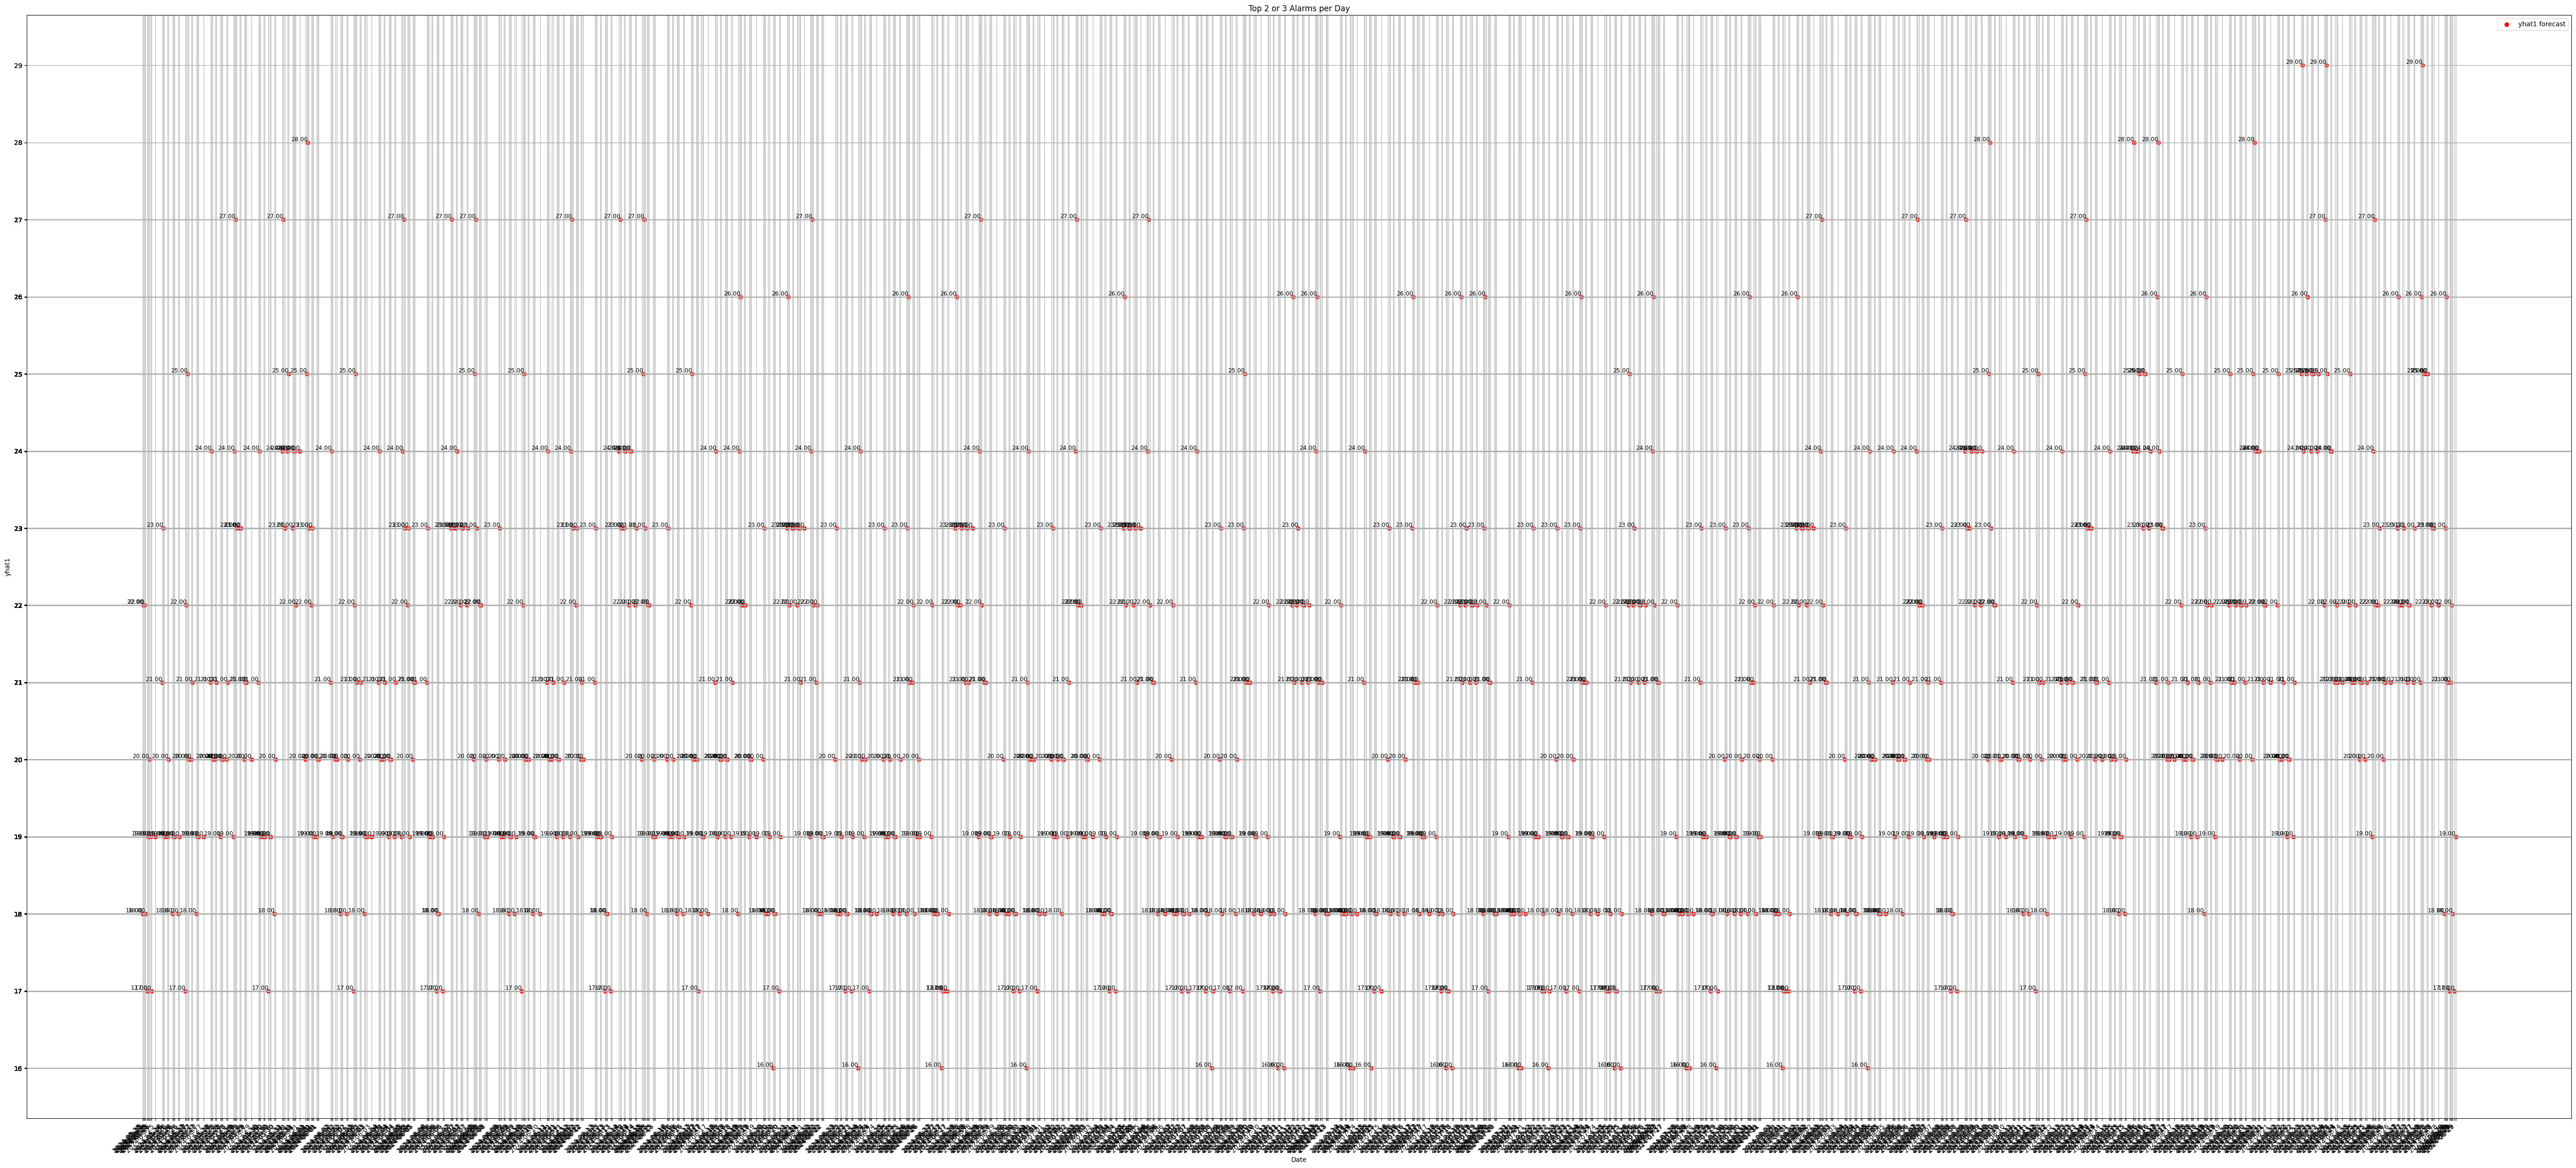

In [26]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Limit to 2 or 3 alarms per day
forecast['date'] = forecast['ds'].dt.date  # Extract the date from the datetime
daily_predictions = forecast.groupby('date').apply(lambda x: x.nlargest(10, 'yhat1')).reset_index(drop=True)

# Create a new figure with adjusted size
fig, ax = plt.subplots(figsize=(55, 25))

# Plot 'yhat1' as dots on top of the existing plot
ax.scatter(daily_predictions['ds'], daily_predictions['yhat1'], color='red', label='yhat1 forecast')

# Add labels to data points
for i, row in daily_predictions.iterrows():
    ax.text(row['ds'], row['yhat1'], f'{row["yhat1"]:.2f}', fontsize=9, ha='right', va='bottom')

ax.set_xlabel('Date')
ax.set_ylabel('yhat1')
ax.set_title('Top 2 or 3 Alarms per Day')
ax.legend()
ax.grid(True)  # Add grid lines for better readability

# Set x-axis ticks to show all dates
plt.xticks(daily_predictions['ds'], rotation=45, ha='right')

# Set y-axis ticks to show all yhat1 values
plt.yticks(daily_predictions['yhat1'])

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot